## Import Data & Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load iris database
data = pd.read_csv('/home/utkarsh/LearnBay/ML_Python/Iris.csv')
data.sample(n=5)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
88    89            5.6           3.0            4.1           1.3   
108  109            6.7           2.5            5.8           1.8   
22    23            4.6           3.6            1.0           0.2   
55    56            5.7           2.8            4.5           1.3   
119  120            6.0           2.2            5.0           1.5   

             Species  
88   Iris-versicolor  
108   Iris-virginica  
22       Iris-setosa  
55   Iris-versicolor  
119   Iris-virginica

## Data Distribution

In [3]:
data.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

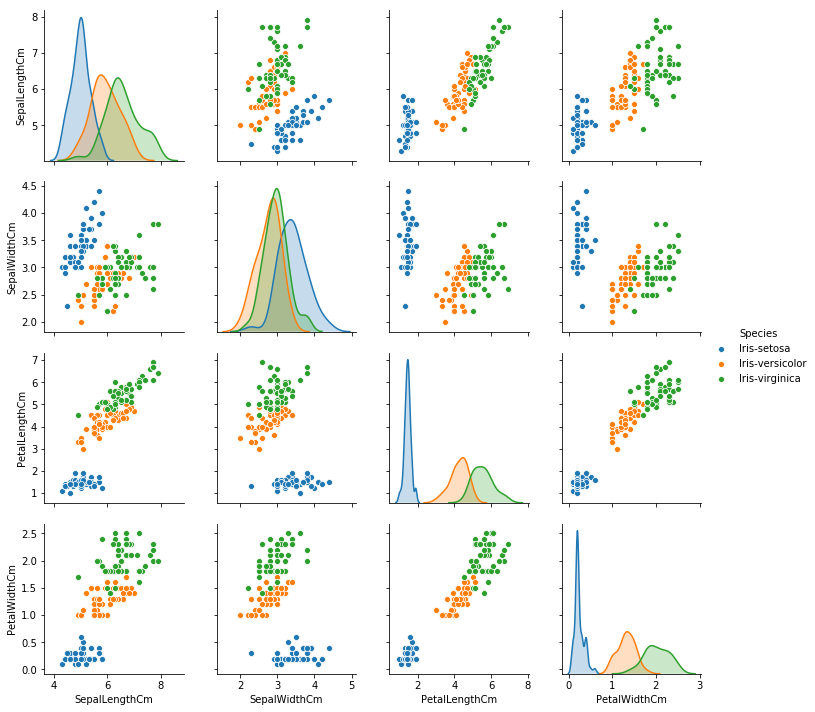

In [4]:
# simple visualization to show how the inputs compare against each other
sns.pairplot( data=data, vars=('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'), hue='Species' )

## Data Normalization

In [7]:
df_norm = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=5)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
76        0.694444      0.333333       0.644068      0.541667
147       0.611111      0.416667       0.711864      0.791667
59        0.250000      0.291667       0.491525      0.541667
41        0.055556      0.125000       0.050847      0.083333
131       1.000000      0.750000       0.915254      0.791667

In [8]:
df_norm.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        0.428704      0.439167       0.467571      0.457778
std         0.230018      0.180664       0.299054      0.317984
min         0.000000      0.000000       0.000000      0.000000
25%         0.222222      0.333333       0.101695      0.083333
50%         0.416667      0.416667       0.567797      0.500000
75%         0.583333      0.541667       0.694915      0.708333
max         1.000000      1.000000       1.000000      1.000000

## Map the classes to 0,1,2

In [9]:
target = data[['Species']].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])
target.sample(n=5)

Species
68         1
124        2
32         0
125        2
105        2

In [10]:
df = pd.concat([df_norm, target], axis=1)
df.sample(n=5)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
144       0.666667      0.541667       0.796610      1.000000        2
104       0.611111      0.416667       0.813559      0.875000        2
46        0.222222      0.750000       0.101695      0.041667        0
31        0.305556      0.583333       0.084746      0.125000        0
96        0.388889      0.375000       0.542373      0.500000        1

## Testing Data

In [11]:
train_test_per = 90/100.0
df['train'] = np.random.rand(len(df)) < train_test_per
df.sample(n=5)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species  train
110       0.611111      0.500000       0.694915      0.791667        2   True
15        0.388889      1.000000       0.084746      0.125000        0   True
138       0.472222      0.416667       0.644068      0.708333        2   True
126       0.527778      0.333333       0.644068      0.708333        2   True
25        0.194444      0.416667       0.101695      0.041667        0  False

In [12]:
train = df[df.train == 1]
train = train.drop('train', axis=1).sample(frac=1)
train.sample(n=5)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
14        0.416667      0.833333       0.033898      0.041667        0
32        0.250000      0.875000       0.084746      0.000000        0
116       0.611111      0.416667       0.762712      0.708333        2
97        0.527778      0.375000       0.559322      0.500000        1
36        0.333333      0.625000       0.050847      0.041667        0

In [13]:
test = df[df.train == 0]
test = test.drop('train', axis=1)
test.sample(n=5)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
63        0.500000      0.375000       0.627119      0.541667        1
117       0.944444      0.750000       0.966102      0.875000        2
24        0.138889      0.583333       0.152542      0.041667        0
45        0.138889      0.416667       0.067797      0.083333        0
35        0.194444      0.500000       0.033898      0.041667        0

In [14]:
X = train.values[:,:4]
X[:5]

array([[0.77777778, 0.41666667, 0.83050847, 0.83333333],
       [0.72222222, 0.5       , 0.79661017, 0.91666667],
       [0.52777778, 0.375     , 0.55932203, 0.5       ],
       [0.30555556, 0.58333333, 0.11864407, 0.04166667],
       [0.38888889, 0.33333333, 0.59322034, 0.5       ]])

In [15]:
targets = [[1,0,0],[0,1,0],[0,0,1]]
y = np.array([targets[int(x)] for x in train.values[:,4:5]])
y[:5]

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0]])

## BackPropagation Layer

In [17]:
#Create 3 layers: Input, hidden and Output.
#Inputs = length and widths of the species
#Output = 3 values, each one indicating a species. ie Values 1, 0, 0 for the output indicates Iris-setosa
#w1 is a matrices of weight connecting Input and the hidden layer. Each node in input layer connects to each node in the hidden layer.

#Weight are randomized between -1 and 1.

In [16]:
num_inputs = len(X[0])
hidden_layer_neurons = 5
np.random.seed(4)
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1
w1

array([[ 0.93405968,  0.0944645 ,  0.94536872,  0.42963199,  0.39545765],
       [-0.56782101,  0.95254891, -0.98753949, -0.49403528, -0.13041694],
       [ 0.55876584, -0.60462985,  0.72598647,  0.96680135, -0.67231552],
       [ 0.19466789, -0.9820278 , -0.22685743, -0.91167988,  0.91330594]])

In [18]:
#w2 are the weights of connections between hidden layer and output layer.
num_outputs = len(y[0])
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1
w2

array([[-0.12770671,  0.89795461,  0.57261197],
       [ 0.7325786 , -0.65366916, -0.85010283],
       [ 0.20148544, -0.66405563,  0.46676034],
       [-0.18311228,  0.05581765,  0.87514317],
       [ 0.04339224, -0.78361323, -0.68355319]])

## Train Neural Network using BackPropagation

In [19]:
# taken from> https://gist.github.com/craffel/2d727968c3aaebd10359
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

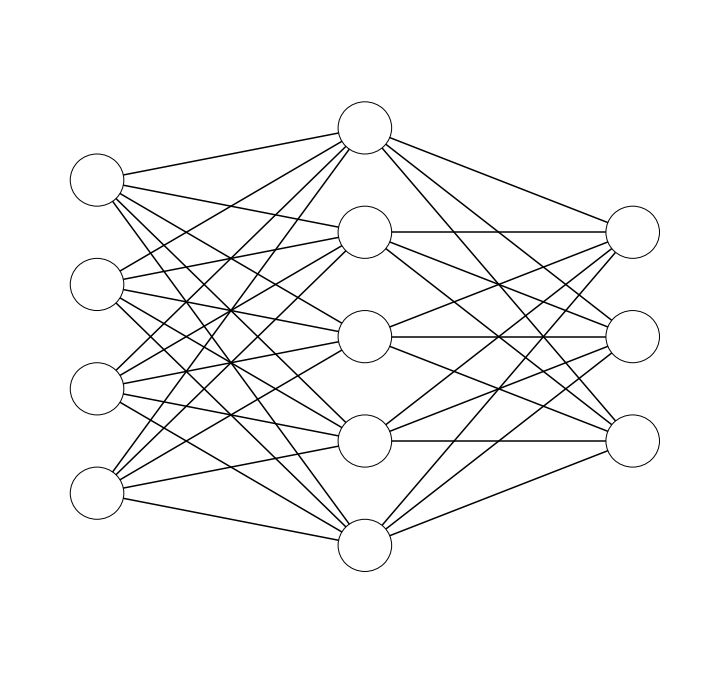

In [20]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [4, 5, 3])

## Sigmoid Function

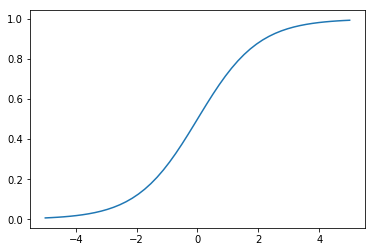

In [21]:
# sigmoid function representation
_x = np.linspace( -5, 5, 50 )
_y = 1 / ( 1 + np.exp( -_x ) )
plt.plot( _x, _y )

In [22]:
learning_rate = 0.2 # slowly update the network
for epoch in range(50000):
    l1 = 1/(1 + np.exp(-(np.dot(X, w1)))) # sigmoid function
    l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))
    er = (abs(y - l2)).mean()
    l2_delta = (y - l2)*(l2 * (1-l2))
    l1_delta = l2_delta.dot(w2.T) * (l1 * (1-l1))
    w2 += l1.T.dot(l2_delta) * learning_rate
    w1 += X.T.dot(l1_delta) * learning_rate
print('Error:', er)

Error: 0.04901377214957935


In [23]:
#Test the network for accuracy.
#Run the network with the updated weights from training.
X = test.values[:,:4]
y = np.array([targets[int(x)] for x in test.values[:,4:5]])

l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))

np.round(l2,3)

array([[1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.655, 0.296],
       [0.   , 0.944, 0.039],
       [0.   , 0.995, 0.002],
       [0.   , 0.173, 0.845],
       [0.   , 0.114, 0.907],
       [0.   , 0.054, 0.96 ]])

## Predictions

In [24]:
#From the above maxtrix we take the maximum value (per row), which forms our predictions...
yp = np.argmax(l2, axis=1) # prediction
res = yp == np.argmax(y, axis=1)
correct = np.sum(res)/len(res)

testres = test[['Species']].replace([0,1,2], ['Iris-setosa','Iris-versicolor','Iris-virginica'])

testres['Prediction'] = yp
testres['Prediction'] = testres['Prediction'].replace([0,1,2], ['Iris-setosa','Iris-versicolor','Iris-virginica'])

print(testres)
print('Correct:',sum(res),'/',len(res), ':', (correct*100),'%')

             Species       Prediction
24       Iris-setosa      Iris-setosa
25       Iris-setosa      Iris-setosa
35       Iris-setosa      Iris-setosa
38       Iris-setosa      Iris-setosa
39       Iris-setosa      Iris-setosa
45       Iris-setosa      Iris-setosa
63   Iris-versicolor  Iris-versicolor
71   Iris-versicolor  Iris-versicolor
93   Iris-versicolor  Iris-versicolor
117   Iris-virginica   Iris-virginica
123   Iris-virginica   Iris-virginica
124   Iris-virginica   Iris-virginica
Correct: 12 / 12 : 100.0 %
